Top 15 most important features:
              Importance
FeatureIndex            
100             0.010926
102             0.010186
105             0.008999
103             0.008079
101             0.007473
104             0.006506
8               0.005672
9               0.004986
3               0.004243
5               0.004036
2               0.004001
0               0.003360
6               0.003289
7               0.003287
1               0.003131


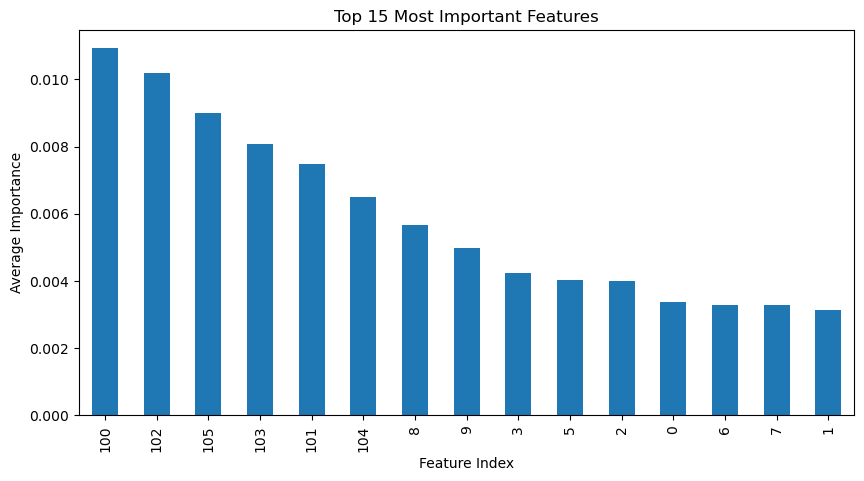

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Load the data
x_train = pd.read_csv('x_train.txt', header=None, delim_whitespace=True)
y_train = pd.read_csv('y_train.txt', header=None, delim_whitespace=True)[0]

# Train a model to get feature importances
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)
importances = model.feature_importances_

# Define thresholds to explore
thresholds = np.sort(importances)

# To store feature importances across all thresholds
feature_importance_data = []

for thresh in thresholds:
    # Select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(x_train)
    
    # Get indices of selected features
    selected_indices = selection.get_support(indices=True)
    
    # Collect importance of each selected feature
    for index in selected_indices:
        feature_importance_data.append((index, importances[index]))

# Convert collected data to DataFrame for analysis
importance_df = pd.DataFrame(feature_importance_data, columns=['FeatureIndex', 'Importance'])

# Group by feature index and calculate mean importance
grouped_importances = importance_df.groupby('FeatureIndex').mean().sort_values(by='Importance', ascending=False)

# Get top 15 most important features
top_15_features = grouped_importances.head(15)

print("Top 15 most important features:")
print(top_15_features)

# You can also visualize the results if you want to plot feature importances
plt.figure(figsize=(10, 5))
top_15_features['Importance'].plot(kind='bar')
plt.title('Top 15 Most Important Features')
plt.xlabel('Feature Index')
plt.ylabel('Average Importance')
plt.show()


Top 15 most important features:
              Importance  MeanCVScore
FeatureIndex                         
100             0.010926     0.631378
102             0.010186     0.631634
105             0.008999     0.631795
103             0.008079     0.631858
101             0.007473     0.631850
104             0.006506     0.631766
8               0.005672     0.631651
9               0.004986     0.631529
3               0.004243     0.631411
5               0.004036     0.631305
2               0.004001     0.631185
0               0.003360     0.631079
6               0.003289     0.630960
7               0.003287     0.630844
1               0.003131     0.630715


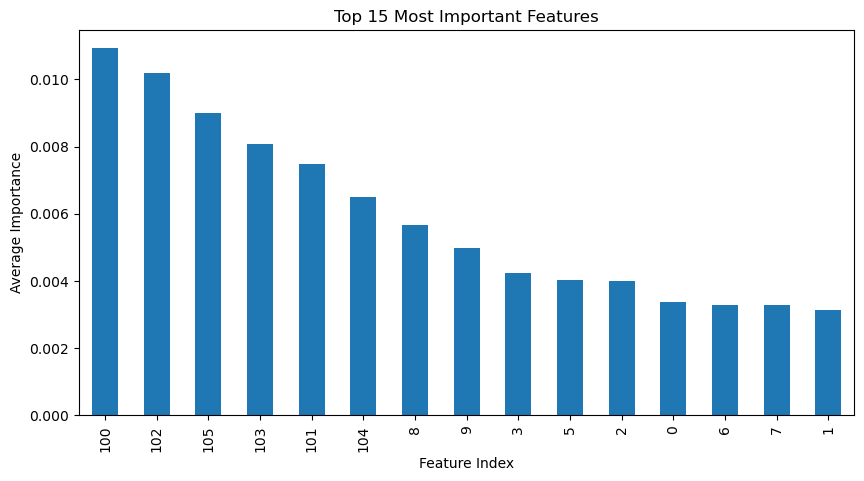

In [6]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Load the data
x_train = pd.read_csv('x_train.txt', header=None, delim_whitespace=True)
y_train = pd.read_csv('y_train.txt', header=None, delim_whitespace=True)[0]

# Train a model to get feature importances
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)
importances = model.feature_importances_

# Define thresholds to explore
thresholds = np.sort(importances)

# To store feature importances across all thresholds
feature_importance_data = []

# Variable to change random seed in each iteration
seed = 42

for thresh in thresholds:
    # Select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(x_train)

    # Get indices of selected features
    selected_indices = selection.get_support(indices=True)

    # Model with selected features
    selection_model = RandomForestClassifier(random_state=seed)
    cv_scores = cross_val_score(selection_model, select_X_train, y_train, cv=5)
    mean_score = np.mean(cv_scores)

    # Collect importance of each selected feature and update seed
    for index in selected_indices:
        feature_importance_data.append((index, importances[index], mean_score))

    seed += 1  # Increment seed for the next iteration

# Convert collected data to DataFrame for analysis
importance_df = pd.DataFrame(feature_importance_data, columns=['FeatureIndex', 'Importance', 'MeanCVScore'])

# Group by feature index and calculate mean importance and mean CV score
grouped_importances = importance_df.groupby('FeatureIndex').agg({
    'Importance': 'mean',
    'MeanCVScore': 'mean'
}).sort_values(by='Importance', ascending=False)

# Get top 15 most important features
top_15_features = grouped_importances.head(15)

print("Top 15 most important features:")
print(top_15_features)

# You can also visualize the results if you want to plot feature importances
plt.figure(figsize=(10, 5))
top_15_features['Importance'].plot(kind='bar')
plt.title('Top 15 Most Important Features')
plt.xlabel('Feature Index')
plt.ylabel('Average Importance')
plt.show()


Top 15 most important interaction features:
105 104 - Importance: 0.011785035695509045
100 101 - Importance: 0.011925344501662218
101 104 - Importance: 0.012000519908227775
100 104 - Importance: 0.012152630154481404
100 103 - Importance: 0.012190207011196618
102 - Importance: 0.012954416875369643
102 105 - Importance: 0.013474105278998581
100 105 - Importance: 0.013672904350105663
100 102 - Importance: 0.013795148050481477
102 101 - Importance: 0.014028393996548837
105 103 - Importance: 0.014033427097886575
102 104 - Importance: 0.01426651033424822
100 - Importance: 0.014585593503985589
102 103 - Importance: 0.01497352528527779
105 101 - Importance: 0.01624384023653134


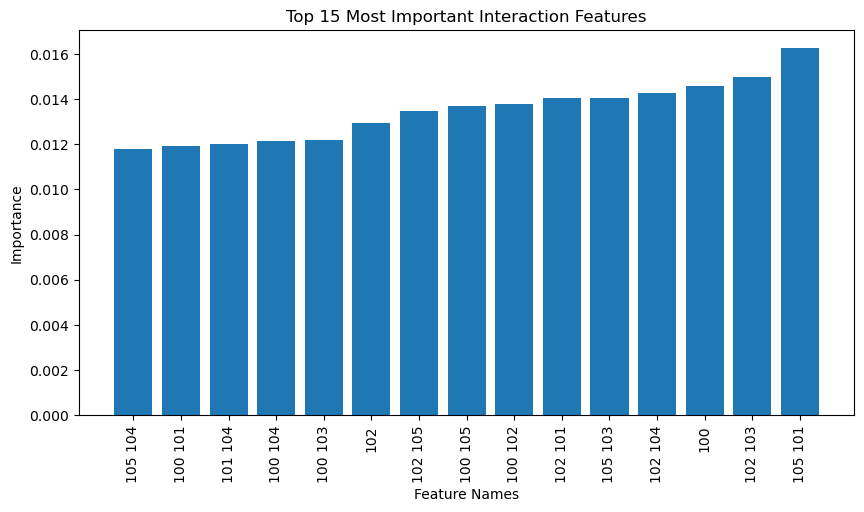

In [6]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Load the data
x_train = pd.read_csv('x_train.txt', header=None, delim_whitespace=True)
y_train = pd.read_csv('y_train.txt', header=None, delim_whitespace=True)[0]

# Identify top 15 features
top_15_features_indices = [100, 102, 105, 103, 101, 104, 8, 9, 3, 5, 2, 0, 6, 7, 1]

# Extract the top 15 features from x_train
x_train_top_15 = x_train.iloc[:, top_15_features_indices]

# Create pairwise interactions using PolynomialFeatures
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
x_train_interactions = poly.fit_transform(x_train_top_15)

# Get the names of the interaction features
interaction_features = poly.get_feature_names_out(input_features=[str(idx) for idx in top_15_features_indices])
x_train_interactions_df = pd.DataFrame(x_train_interactions, columns=interaction_features)

# Train a model to get feature importances
model = RandomForestClassifier(random_state=42)
model.fit(x_train_interactions_df, y_train)
importances = model.feature_importances_

# Get indices of top 15 most important new features (including interactions)
top_15_interactions_indices = np.argsort(importances)[-15:]

print("Top 15 most important interaction features:")
for index in top_15_interactions_indices:
    print(f"{interaction_features[index]} - Importance: {importances[index]}")

# Plotting the results
plt.figure(figsize=(10, 5))
plt.bar(range(len(top_15_interactions_indices)), importances[top_15_interactions_indices])
plt.title('Top 15 Most Important Interaction Features')
plt.xlabel('Feature Names')
plt.xticks(ticks=range(len(top_15_interactions_indices)), labels=np.array(interaction_features)[top_15_interactions_indices], rotation=90)
plt.ylabel('Importance')
plt.show()


Mean CV Score: 0.6918
Top 15 most important interaction features:
105 2 - Importance: 0.011653183840430365
100 - Importance: 0.011672774274160524
105 104 - Importance: 0.011778922637445056
105 103 - Importance: 0.012388619819561438
102 105 - Importance: 0.012406724170727843
100 101 - Importance: 0.012501612993018753
100 105 - Importance: 0.012539637657025053
102 101 - Importance: 0.012740291303467354
102 104 - Importance: 0.01274311358341911
102 - Importance: 0.012782011173966793
100 103 - Importance: 0.012896332778093494
100 104 - Importance: 0.013626879925536376
100 102 - Importance: 0.014326829703578976
102 103 - Importance: 0.014903700731107989
105 101 - Importance: 0.016691309836349998


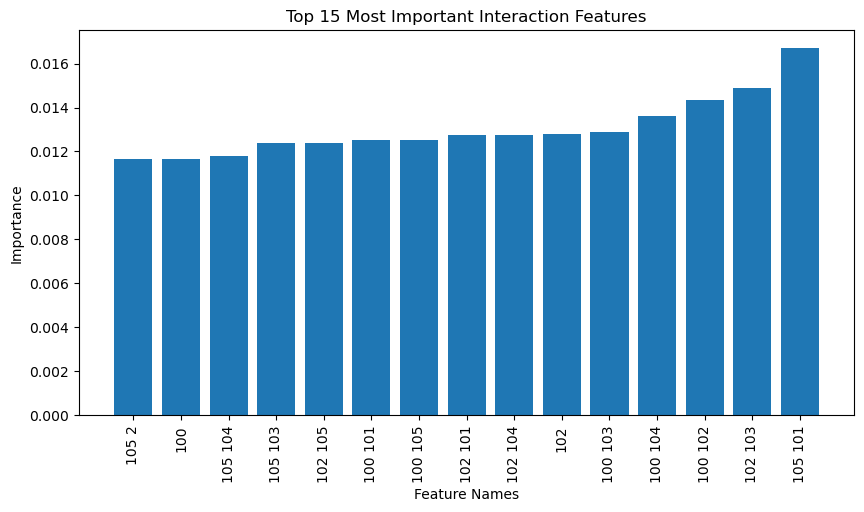

In [8]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Load the data
x_train = pd.read_csv('x_train.txt', header=None, delim_whitespace=True)
y_train = pd.read_csv('y_train.txt', header=None, delim_whitespace=True)[0]

# Identify top 15 features
top_15_features_indices = [100, 102, 105, 103, 101, 104, 8, 9, 3, 5, 2, 0, 6, 7, 1]

# Extract the top 15 features from x_train
x_train_top_15 = x_train.iloc[:, top_15_features_indices]

# Create pairwise interactions using PolynomialFeatures
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
x_train_interactions = poly.fit_transform(x_train_top_15)

# Get the names of the interaction features
interaction_features = poly.get_feature_names_out(input_features=[str(idx) for idx in top_15_features_indices])
x_train_interactions_df = pd.DataFrame(x_train_interactions, columns=interaction_features)

# Initialize the model
model = RandomForestClassifier(random_state=420)

# Perform cross-validation and calculate mean cross-validation score
cv_scores = cross_val_score(model, x_train_interactions_df, y_train, cv=5)
mean_cv_score = np.mean(cv_scores)
print(f"Mean CV Score: {mean_cv_score}")

# Train model to get feature importances
model.fit(x_train_interactions_df, y_train)
importances = model.feature_importances_

# Get indices of top 15 most important new features (including interactions)
top_15_interactions_indices = np.argsort(importances)[-15:]

print("Top 15 most important interaction features:")
for index in top_15_interactions_indices:
    print(f"{interaction_features[index]} - Importance: {importances[index]}")

# Plotting the results
plt.figure(figsize=(10, 5))
plt.bar(range(len(top_15_interactions_indices)), importances[top_15_interactions_indices])
plt.title('Top 15 Most Important Interaction Features')
plt.xlabel('Feature Names')
plt.xticks(ticks=range(len(top_15_interactions_indices)), labels=np.array(interaction_features)[top_15_interactions_indices], rotation=90)
plt.ylabel('Importance')
plt.show()


In [9]:
top_15_interactions_indices

array([49,  0, 44, 42, 29, 18, 16, 31, 32,  1, 17, 19, 15, 30, 43],
      dtype=int64)

In [12]:

# Manual list of top features and interactions from your provided data
top_features_and_interactions = [
    "105 2", "100", "105 104", "105 103", "102 105", "100 101",
    "100 105", "102 101", "102 104", "102", "100 103", "100 104",
    "100 102", "102 103", "105 101", '2', '101', '103', '104', '105'
]


In [13]:
x_train_interactions_df

,100,102,105,103,101,104,8,9,3,5,...,2 0,2 6,2 7,2 1,0 6,0 7,0 1,6 7,6 1,7 1
0,-0.915513,0.264032,1.049388,-0.177042,0.713780,-0.123621,-0.658311,-1.489539,-1.083335,-0.366967,...,3.142025,2.595438,1.451215,3.141738,5.669285,3.169928,6.862583,2.618487,5.668766,3.169638
1,-1.513469,1.071525,-1.191206,1.823868,0.506429,0.083758,-0.916857,-0.570166,-1.958863,0.273030,...,4.077250,4.691177,0.506389,5.134208,2.305593,0.248877,2.523331,0.286352,2.903279,0.313394
2,-1.215839,-0.162820,-0.626576,0.771938,-0.112797,1.255190,-0.394354,-0.806624,-1.282560,0.052349,...,4.463560,3.907837,1.244020,2.248689,6.597337,2.100195,3.796310,1.838716,3.323661,1.058054
3,1.167745,-1.572364,0.861478,0.211630,0.777688,3.029617,1.088656,-0.481210,0.649040,2.308504,...,-0.071235,-0.060546,0.125997,-0.052404,0.325663,-0.677711,0.281869,-0.576017,0.239573,-0.498556
4,0.219875,0.702204,-1.422561,-0.455936,0.579971,0.993229,-0.505775,-0.758430,-0.693065,-0.395862,...,0.039982,-0.001793,0.555155,0.311344,-0.000224,0.069394,0.038918,-0.003112,-0.001745,0.540385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-1.115238,0.518670,0.268827,0.816333,-0.041932,-2.106221,-1.037255,-0.691466,-0.827217,-0.544141,...,2.293290,2.438748,-1.196793,4.059611,1.301318,-0.638610,2.166211,-0.679115,2.303609,-1.130475
4996,-0.157643,0.083440,0.025449,-2.198985,0.098028,-0.392815,-2.351449,-2.562465,-1.769853,-3.293880,...,4.175313,3.951659,4.859068,4.697933,9.711271,11.941245,11.545255,11.301602,10.926824,13.435922
4997,0.412870,1.335438,0.473756,-0.928147,-1.730745,-0.900783,-1.831778,-3.139882,-1.414368,-1.455748,...,0.443207,1.618973,-0.164985,3.347089,0.641280,-0.065351,1.325793,-0.238719,4.842934,-0.493531
4998,0.406267,-0.237090,1.023475,1.129644,0.568479,0.005900,0.695188,0.829632,0.475785,2.087545,...,0.164608,0.171957,0.086102,0.077144,5.483079,2.745484,2.459856,2.868056,2.569676,1.286687


In [14]:
final_features = x_train_interactions_df[top_features_and_interactions]

In [15]:
final_features

,105 2,100,105 104,105 103,102 105,100 101,100 105,102 101,102 104,102,100 103,100 104,100 102,102 103,105 101,2,101,103,104,105
0,-1.258584,-0.915513,-0.129726,-0.185786,0.277073,-0.653475,-0.960729,0.188461,-0.032640,0.264032,0.162085,0.113177,-0.241725,-0.046745,0.749033,-1.199350,0.713780,-0.177042,-0.123621,1.049388
1,3.430995,-1.513469,-0.099773,-2.172602,-1.276406,-0.766466,1.802854,0.542652,0.089749,1.071525,-2.760368,-0.126765,-1.621720,1.954319,-0.603262,-2.880270,0.506429,1.823868,0.083758,-1.191206
2,1.018822,-1.215839,-0.786472,-0.483678,0.102019,0.137144,0.761816,0.018366,-0.204371,-0.162820,-0.938552,-1.526109,0.197963,-0.125687,0.070676,-1.626015,-0.112797,0.771938,1.255190,-0.626576
3,-0.099140,1.167745,2.609949,0.182315,-1.354557,0.908141,1.005986,-1.222808,-4.763660,-1.572364,0.247130,3.537819,-1.836119,-0.332760,0.669961,-0.115081,0.777688,0.211630,3.029617,0.861478
4,0.804537,0.219875,-1.412929,0.648597,-0.998928,0.127521,-0.312785,0.407258,0.697449,0.702204,-0.100249,0.218386,0.154397,-0.320160,-0.825045,-0.565556,0.579971,-0.455936,0.993229,-1.422561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-0.557307,-1.115238,-0.566210,0.219453,0.139433,0.046765,-0.299806,-0.021749,-1.092433,0.518670,-0.910406,2.348937,-0.578440,0.423407,-0.011273,-2.073105,-0.041932,0.816333,-2.106221,0.268827
4996,-0.033171,-0.157643,-0.009997,-0.055961,0.002123,-0.015453,-0.004012,0.008179,-0.032776,0.083440,0.346655,0.061925,-0.013154,-0.183483,0.002495,-1.303455,0.098028,-2.198985,-0.392815,0.025449
4997,-0.501134,0.412870,-0.426752,-0.439715,0.632672,-0.714573,0.195600,-2.311302,-1.202940,1.335438,-0.383204,-0.371906,0.551362,-1.239483,-0.819951,-1.057789,-1.730745,-0.928147,-0.900783,0.473756
4998,0.073536,0.406267,0.006038,1.156162,-0.242656,0.230954,0.415804,-0.134781,-0.001399,-0.237090,0.458937,0.002397,-0.096322,-0.267828,0.581824,0.071849,0.568479,1.129644,0.005900,1.023475


# Models

In [16]:
selected_features = [100, 102, 105, 103, 101, 104]  # Indices of the most important features


In [23]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Load data
x_train = pd.read_csv('x_train.txt', header=None, delim_whitespace=True)
x_test = pd.read_csv('x_test.txt', header=None, delim_whitespace=True)
y_train = pd.read_csv('y_train.txt', header=None, delim_whitespace=True)[0]

# Select features from the data
selected_features = [100, 102, 105, 103, 101, 104]  # Indices of the most important features
x_train_selected = x_train.iloc[:, selected_features]
x_test_selected = x_test.iloc[:, selected_features]

# Create polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
x_train_poly = poly.fit_transform(x_train_selected)
x_test_poly = poly.transform(x_test_selected)

# Get the names of the interaction features
interaction_feature_names = poly.get_feature_names_out(input_features=[str(f) for f in selected_features])

# Initialize and train the QDA model
qda = QuadraticDiscriminantAnalysis()
qda.fit(x_train_poly, y_train)

# Predict probabilities on the test set
predicted_probabilities = qda.predict_proba(x_test_poly)[:, 1]

# Select the top 1000 customers likely to respond to the offer
indices_top_1000 = np.argsort(predicted_probabilities)[-1000:]

# Calculate the mean probability of acceptance in the selected top 1000
predicted_accepts = predicted_probabilities[indices_top_1000].mean() * 1000

# Calculate costs: extract all feature indices including interactions
all_feature_indices = poly.get_feature_names_out(input_features=[str(f) for f in selected_features])

# Map feature names back to original and interaction indices
used_features_indices = []
for name in all_feature_indices:
    if " " in name:  # it's an interaction term
        feats = name.split()
        used_features_indices.extend([int(feat) for feat in feats])
    else:
        used_features_indices.append(int(name))

# Deduplicate and sort the list
used_features_indices = sorted(set(used_features_indices))

# Calculate costs: assuming `used_features_indices` refers to the features used including interactions
cost_per_variable = 200 * len(used_features_indices)

# Calculate potential revenue from accepts
revenue_from_accepts = predicted_accepts * 10  # Each acceptance brings 10 euros

# Calculate net revenue
net_revenue = revenue_from_accepts - cost_per_variable

# Output the estimated net revenue
print(f"Estimated Revenue: €{net_revenue:.2f}")

# Save the indices of top 1000 predictions and features used for submission or further analysis
# pd.DataFrame(indices_top_1000).to_csv('STUDENTID_obs.txt', index=False, header=False)
# pd.DataFrame({'FeatureIndex': used_features_indices}).to_csv('STUDENTID_vars.txt', index=False, header=False)


Estimated Revenue: €8794.45


In [22]:
used_features_indices

[100, 101, 102, 103, 104, 105]

# Second model  with 2 added, lower revenue

In [24]:
selected_features = [100, 102, 105, 103, 101, 104, 2]  # Indices of the most important features

In [26]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Load data
x_train = pd.read_csv('x_train.txt', header=None, delim_whitespace=True)
x_test = pd.read_csv('x_test.txt', header=None, delim_whitespace=True)
y_train = pd.read_csv('y_train.txt', header=None, delim_whitespace=True)[0]

# Select features from the data
selected_features = [100, 102, 105, 103, 101, 104, 2]  # Indices of the most important features
x_train_selected = x_train.iloc[:, selected_features]
x_test_selected = x_test.iloc[:, selected_features]

# Create polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
x_train_poly = poly.fit_transform(x_train_selected)
x_test_poly = poly.transform(x_test_selected)

# Get the names of the interaction features
interaction_feature_names = poly.get_feature_names_out(input_features=[str(f) for f in selected_features])

# Initialize and train the QDA model
qda = QuadraticDiscriminantAnalysis()
qda.fit(x_train_poly, y_train)

# Predict probabilities on the test set
predicted_probabilities = qda.predict_proba(x_test_poly)[:, 1]

# Select the top 1000 customers likely to respond to the offer
indices_top_1000 = np.argsort(predicted_probabilities)[-1000:]

# Calculate the mean probability of acceptance in the selected top 1000
predicted_accepts = predicted_probabilities[indices_top_1000].mean() * 1000

# Calculate costs: extract all feature indices including interactions
all_feature_indices = poly.get_feature_names_out(input_features=[str(f) for f in selected_features])

# Map feature names back to original and interaction indices
used_features_indices = []
for name in all_feature_indices:
    if " " in name:  # it's an interaction term
        feats = name.split()
        used_features_indices.extend([int(feat) for feat in feats])
    else:
        used_features_indices.append(int(name))

# Deduplicate and sort the list
used_features_indices = sorted(set(used_features_indices))

# Calculate costs: assuming `used_features_indices` refers to the features used including interactions
cost_per_variable = 200 * len(used_features_indices)

# Calculate potential revenue from accepts
revenue_from_accepts = predicted_accepts * 10  # Each acceptance brings 10 euros

# Calculate net revenue
net_revenue = revenue_from_accepts - cost_per_variable

# Output the estimated net revenue
print(f"Estimated Revenue: €{net_revenue:.2f}")

# Save the indices of top 1000 predictions and features used for submission or further analysis
# pd.DataFrame(indices_top_1000).to_csv('STUDENTID_obs.txt', index=False, header=False)
# pd.DataFrame({'FeatureIndex': used_features_indices}).to_csv('STUDENTID_vars.txt', index=False, header=False)


Estimated Revenue: €8598.91


# Last model only 3 variables  - the best (?)

In [27]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Load data
x_train = pd.read_csv('x_train.txt', header=None, delim_whitespace=True)
x_test = pd.read_csv('x_test.txt', header=None, delim_whitespace=True)
y_train = pd.read_csv('y_train.txt', header=None, delim_whitespace=True)[0]

# Select features from the data
selected_features = [100, 102, 105, 103]  # Indices of the most important features
x_train_selected = x_train.iloc[:, selected_features]
x_test_selected = x_test.iloc[:, selected_features]

# Create polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
x_train_poly = poly.fit_transform(x_train_selected)
x_test_poly = poly.transform(x_test_selected)

# Get the names of the interaction features
interaction_feature_names = poly.get_feature_names_out(input_features=[str(f) for f in selected_features])

# Initialize and train the QDA model
qda = QuadraticDiscriminantAnalysis()
qda.fit(x_train_poly, y_train)

# Predict probabilities on the test set
predicted_probabilities = qda.predict_proba(x_test_poly)[:, 1]

# Select the top 1000 customers likely to respond to the offer
indices_top_1000 = np.argsort(predicted_probabilities)[-1000:]

# Calculate the mean probability of acceptance in the selected top 1000
predicted_accepts = predicted_probabilities[indices_top_1000].mean() * 1000

# Calculate costs: extract all feature indices including interactions
all_feature_indices = poly.get_feature_names_out(input_features=[str(f) for f in selected_features])

# Map feature names back to original and interaction indices
used_features_indices = []
for name in all_feature_indices:
    if " " in name:  # it's an interaction term
        feats = name.split()
        used_features_indices.extend([int(feat) for feat in feats])
    else:
        used_features_indices.append(int(name))

# Deduplicate and sort the list
used_features_indices = sorted(set(used_features_indices))

# Calculate costs: assuming `used_features_indices` refers to the features used including interactions
cost_per_variable = 200 * len(used_features_indices)

# Calculate potential revenue from accepts
revenue_from_accepts = predicted_accepts * 10  # Each acceptance brings 10 euros

# Calculate net revenue
net_revenue = revenue_from_accepts - cost_per_variable

# Output the estimated net revenue
print(f"Estimated Revenue: €{net_revenue:.2f}")

# Save the indices of top 1000 predictions and features used for submission or further analysis
# pd.DataFrame(indices_top_1000).to_csv('STUDENTID_obs.txt', index=False, header=False)
# pd.DataFrame({'FeatureIndex': used_features_indices}).to_csv('STUDENTID_vars.txt', index=False, header=False)


Estimated Revenue: €9016.19


In [37]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from xgboost import XGBClassifier

# Load data
x_train = pd.read_csv('x_train.txt', header=None, delim_whitespace=True)
x_test = pd.read_csv('x_test.txt', header=None, delim_whitespace=True)
y_train = pd.read_csv('y_train.txt', header=None, delim_whitespace=True)[0]

# Select features from the data
selected_features = [100, 102, 105 ]  # Indices of the most important features
x_train_selected = x_train.iloc[:, selected_features]
x_test_selected = x_test.iloc[:, selected_features]

# Create polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
x_train_poly = poly.fit_transform(x_train_selected)
x_test_poly = poly.transform(x_test_selected)

# Initialize and train the XGBoost classifier
xgb = XGBClassifier(
    objective='binary:logistic', 
    n_estimators=1000, 
    learning_rate=0.1, 
    max_depth=15, 
    use_label_encoder=False,
    eval_metric='logloss'
)
xgb.fit(x_train_poly, y_train)

# Predict probabilities on the test set
predicted_probabilities = xgb.predict_proba(x_test_poly)[:, 1]

# Select the top 1000 customers likely to respond to the offer
indices_top_1000 = np.argsort(predicted_probabilities)[-1000:]

# Calculate the mean probability of acceptance in the selected top 1000
predicted_accepts = predicted_probabilities[indices_top_1000].mean() * 1000

# Calculate costs: assuming `selected_features` refers to the features used including interactions
cost_per_variable = 200 * len(selected_features)

# Calculate potential revenue from accepts
revenue_from_accepts = predicted_accepts * 10  # Each acceptance brings 10 euros

# Calculate net revenue
net_revenue = revenue_from_accepts - cost_per_variable

# Output the estimated net revenue
print(f"Estimated Revenue: €{net_revenue:.2f}")

# Save the indices of top 1000 predictions and features used for submission or further analysis
pd.DataFrame(indices_top_1000).to_csv('STUDENTID_obs.txt', index=False, header=False)
pd.DataFrame({'FeatureIndex': selected_features}).to_csv('STUDENTID_vars.txt', index=False, header=False)


Estimated Revenue: €9214.99


# Nonsense

In [33]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define our candidate hyperparameters
param_grid = {
    'max_depth': [3, 4, 5, 10, 15, 20, 50, 1000],
    'n_estimators': [50, 100, 200, 1000, 10000],
    'learning_rate': [0.01, 0.1, 0.2, 0.3]
}

# Setup the grid search
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='accuracy')

# Fit grid search
best_model = grid_search.fit(x_train_poly, y_train)

# Get the best model
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)


Best parameters found:  {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 200}
Best accuracy found:  0.6293999303380621


# TEST TRAIN XGBOOST  - Second Best (?)

In [55]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from xgboost import XGBClassifier

# Load data
data = pd.read_csv('x_train.txt', header=None, delim_whitespace=True)
labels = pd.read_csv('y_train.txt', header=None, delim_whitespace=True)[0]

# Select features from the data
selected_features = [100, 102, 105]  # Indices of the most important features
data_selected = data.iloc[:, selected_features]

# Create polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
data_poly = poly.fit_transform(data_selected)

# Split the data into training and testing sets (50% split)
x_train_poly, x_test_poly, y_train, y_test = train_test_split(data_poly, labels, test_size=0.5, random_state=4)

# Initialize and train the XGBoost classifier
xgb = XGBClassifier(
    objective='binary:logistic',
    n_estimators=1000,
    learning_rate=0.1,
    max_depth=15,
    use_label_encoder=False,
    eval_metric='logloss'
)
xgb.fit(x_train_poly, y_train)

# Predict probabilities on the test set
predicted_probabilities = xgb.predict_proba(x_test_poly)[:, 1]

# Select the top 1000 customers likely to respond to the offer
indices_top_1000 = np.argsort(predicted_probabilities)[-1000:]

# Calculate the mean probability of acceptance in the selected top 1000
predicted_accepts = predicted_probabilities[indices_top_1000].mean() * 1000

# Calculate costs: assuming `selected_features` refers to the features used including interactions
cost_per_variable = 200 * len(selected_features)

# Calculate potential revenue from accepts
revenue_from_accepts = predicted_accepts * 10  # Each acceptance brings 10 euros

# Calculate net revenue
net_revenue = revenue_from_accepts - cost_per_variable

# Output the estimated net revenue
print(f"Estimated Revenue: €{net_revenue:.2f}")

Estimated Revenue: €8565.32


# TEST TRAIN QDA

In [56]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, roc_auc_score

# Load data
data = pd.read_csv('x_train.txt', header=None, delim_whitespace=True)
labels = pd.read_csv('y_train.txt', header=None, delim_whitespace=True)[0]

# Select features from the data
selected_features = [100, 102, 105]  # Indices of the most important features
data_selected = data.iloc[:, selected_features]

# Create polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
data_poly = poly.fit_transform(data_selected)

# Split the data into training and testing sets (50% split)
x_train_poly, x_test_poly, y_train, y_test = train_test_split(data_poly, labels, test_size=0.5, random_state=42)

# Initialize and train the QDA model
qda = QuadraticDiscriminantAnalysis()
qda.fit(x_train_poly, y_train)

# Predict probabilities and labels on the test set
predicted_probabilities = qda.predict_proba(x_test_poly)[:, 1]
predicted_labels = qda.predict(x_test_poly)

# Evaluate the model with accuracy and ROC AUC
accuracy = accuracy_score(y_test, predicted_labels)
roc_auc = roc_auc_score(y_test, predicted_probabilities)
print(f"Accuracy: {accuracy:.4f}, ROC AUC Score: {roc_auc:.4f}")

# Select the top 1000 customers likely to respond based on probabilities
indices_top_1000 = np.argsort(predicted_probabilities)[-1000:]

# Calculate the mean probability of acceptance in the selected top 1000
predicted_accepts = predicted_probabilities[indices_top_1000].mean() * 1000

# Calculate costs: assuming `selected_features` refers to the features used including interactions
cost_per_variable = 200 * len(selected_features)

# Calculate potential revenue from accepts
revenue_from_accepts = predicted_accepts * 10  # Each acceptance brings 10 euros

# Calculate net revenue
net_revenue = revenue_from_accepts - cost_per_variable

# Output the estimated net revenue
print(f"Estimated Revenue: €{net_revenue:.2f}")

# Save the indices of top 1000 predictions and features used for submission or further analysis
pd.DataFrame(indices_top_1000).to_csv('STUDENTID_obs.txt', index=False, header=False)
pd.DataFrame({'FeatureIndex': selected_features}).to_csv('STUDENTID_vars.txt', index=False, header=False)


Accuracy: 0.6272, ROC AUC Score: 0.6784
Estimated Revenue: €6993.92
